# Dummy classifiers e svc

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz



SEED = 5
np.random.seed(SEED)

In [2]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
a_renomear = { 
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo',
    'price' : 'preco',
    'sold' :'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
a_trocar = {
    'no': 0,
    'yes': 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [5]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [6]:
dados ['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [7]:
dados = dados.drop(columns = ["Unnamed: 0", "milhas_por_ano", "ano_do_modelo"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [8]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [9]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 46.88%


/opt/anaconda/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### Algorítimo de base gerado pelo `DummyClassifier()`
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

In [10]:
#strategy: default=”prior”
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
previsoes = dummy.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy prior foi %.2f%%" % acuracia)

A acurácia do dummy prior foi 58.00%


In [11]:
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 52.44%


In [12]:
dummy_mostfrequent = DummyClassifier(strategy="most_frequent")
dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia do dummy mostfrequent foi %.2f%%" % acuracia)

A acurácia do dummy mostfrequent foi 58.00%


### O `DummyClassifier()` possui um `.score()` próprio

In [13]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi %.2f%%" % acuracia)

A acurácia do dummy stratified foi 58.00%


### modelo usando o SVC 

In [14]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.44%


### Árvore de decisão e visualizando as decisões de um estimador

In [15]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 71.48%


In [16]:
from sklearn.tree import export_graphviz

export_graphviz(modelo, out_file=None)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[0] <= -0.192\\ngini = 0.487\\nsamples = 7500\\nvalue = [3150, 4350]"] ;\n1 [label="X[0] <= -0.983\\ngini = 0.203\\nsamples = 3235\\nvalue = [370, 2865]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1443\\nvalue = [0, 1443]"] ;\n1 -> 2 ;\n3 [label="X[2] <= -1.438\\ngini = 0.328\\nsamples = 1792\\nvalue = [370, 1422]"] ;\n1 -> 3 ;\n4 [label="X[0] <= -0.633\\ngini = 0.451\\nsamples = 61\\nvalue = [21, 40]"] ;\n3 -> 4 ;\n5 [label="X[1] <= 1.206\\ngini = 0.499\\nsamples = 31\\nvalue = [15, 16]"] ;\n4 -> 5 ;\n6 [label="X[0] <= -0.822\\ngini = 0.483\\nsamples = 27\\nvalue = [11, 16]"] ;\n5 -> 6 ;\n7 [label="X[0] <= -0.94\\ngini = 0.444\\nsamples = 9\\nvalue = [6, 3]"] ;\n6 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n7 -> 8 ;\n9 [label="X[2] <= -1.79\\ngini = 0.245\\nsamples = 7\\nvalue = [6, 1]"] ;\n7 -> 9 ;\n10 [labe

In [17]:
dot_data = export_graphviz(modelo, out_file=None)
grafico = graphviz.Source(dot_data)
grafico

### Em modelo = `DecisionTreeClassifier()`, modificaremos a `max_depth` para 2:



In [21]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.36%


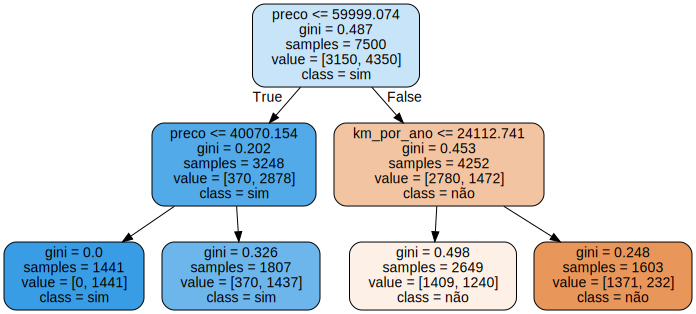

In [20]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico


### As árvores de decisão não exigem que realizemos reescalas para que tenhamos um funcionamento adequado.

Podemos **retirar** o trecho de código relacionado ao `StandardScaler()
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)
`

In [30]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 78.64%


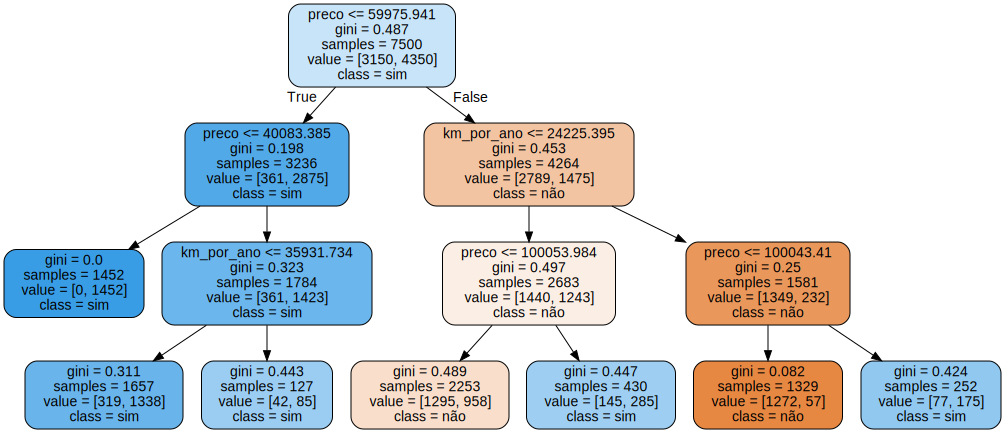

In [29]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico